In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [26]:
# --- Step 2: Load Dataset ---
df = pd.read_csv(r"C:\Users\USER\python\heart_final_selected.csv")
print(" Dataset loaded successfully. Shape:", df.shape)
df.head()


 Dataset loaded successfully. Shape: (303, 10)


,cp,thalach,ca,oldpeak,sex,restecg,exang,thal,slope,target
0,1.0,150.0,0.0,2.3,1.0,2.0,0.0,6.0,3.0,0
1,4.0,108.0,3.0,1.5,1.0,2.0,1.0,3.0,2.0,1
2,4.0,129.0,2.0,2.6,1.0,2.0,1.0,7.0,2.0,1
3,3.0,187.0,0.0,3.5,1.0,0.0,0.0,3.0,3.0,0
4,2.0,172.0,0.0,1.4,0.0,2.0,0.0,3.0,1.0,0


In [27]:
# --- Step 3: Separate Features 
# --- Step 2: Separate Features and Target ---
X = df.drop("target", axis=1)   
y = df["target"]                

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(" Training set shape:", X_train.shape)
print(" Test set shape:", X_test.shape)


 Training set shape: (242, 9)
 Test set shape: (61, 9)


In [28]:
# --- Step 4: Define Models ---
classifiers = {
    "LogReg": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandForest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = []
colors = ["darkorange", "teal", "crimson", "navy"]
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

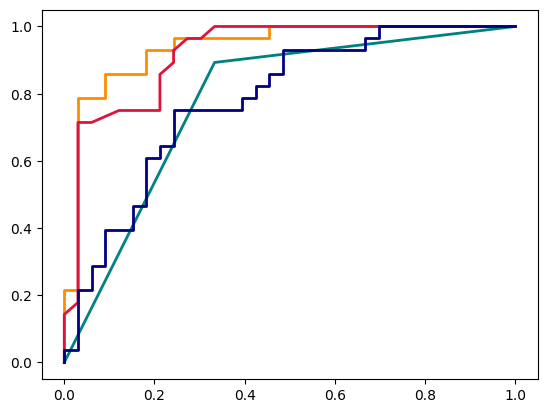

In [29]:
# --- Step 5: Train and Evaluate Models ---
for idx, (model_name, model) in enumerate(classifiers.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec = recall_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })

    if len(np.unique(y)) == 2:  # Binary classification
        # Use only the probability of the positive class
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        roc_auc = auc(fpr, tpr)

        plt.plot(
            fpr, tpr,
            color=colors[idx],
            lw=2,
            label=f"{model_name} (AUC = {roc_auc:.2f})"
        )
    else:  # Multi-class case
        y_bin = label_binarize(y_test, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        plt.plot(
            fpr["micro"], tpr["micro"],
            color=colors[idx],
            lw=2,
            label=f"{model_name} (AUC = {roc_auc['micro']:.2f})"
        )


C:\Users\USER\AppData\Local\Temp\ipykernel_57764\3484843275.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


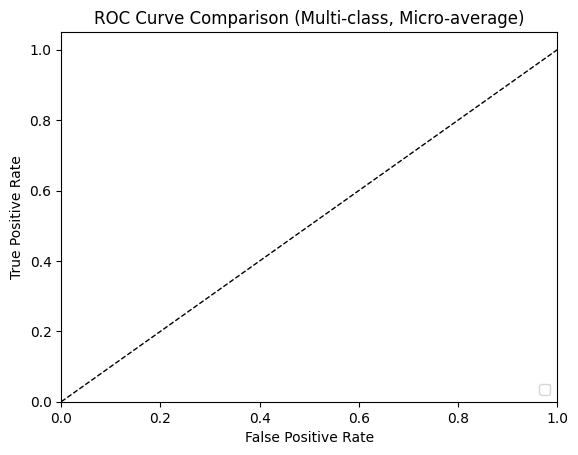

In [30]:
# --- Step 6: ROC Curve Visualization ---
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Multi-class, Micro-average)")
plt.legend(loc="lower right")
plt.show()


In [31]:
# --- Step 7: Performance Table ---
results_df = pd.DataFrame(results)
print("Model Performance Metrics:")
print(results_df)

output_file = r"C:\Users\USER\python\model_performance.csv"
results_df.to_csv(output_file, index=False)


Model Performance Metrics:
          Model  Accuracy  Precision    Recall  F1-score
0        LogReg  0.852459   0.853226  0.855519  0.852300
1  DecisionTree  0.770492   0.787222  0.779762  0.769935
2    RandForest  0.819672   0.820430  0.822511  0.819478
3           SVM  0.704918   0.709790  0.694805  0.695000
